### QED-C Application-Oriented Benchmarks - Hamiltonian Simulation with HamLib - Observables

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one a variation of this benchmark.

This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Note: This set of benchmarks exercises new observable-oriented assessments currently under development.
This is a WORK-IN-PROGRESS.


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
min_qubits=4
max_qubits=20
skip_qubits=1
max_circuits=1
num_shots=10000

K = 5             # number of Trotter steps
t = 1.0           # total evolution time

#backend_id="qasm_simulator"
backend_id="statevector_simulator"

hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}


In [3]:
# Configure benchmark library modules
import sys
sys.path.insert(1, "../_common")
sys.path.insert(1, "../_common/qiskit")

import execute
execute.verbose = False
execute.verbose_time = False
#execute.noise = None

# Configure paths for hamlib benchmark modules
sys.path.insert(1, "_common")
sys.path.insert(1, "qiskit")

# ... access to HamLib datasets
import hamlib_utils
hamlib_utils.verbose = False

# ... for api-specific kernel functions (circuits)
import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False

# ... for high-level HamLib simulation benchmark loop
import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False


### Hamiltonian Simulation - Transverse Field Ising Model


Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/tfim/tfim.zip
       using cached data if possible
... execution starting at Jan 30, 2025 07:28:11 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... total execution time = 0.036
... exact computation time = 0.008 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -3.3711
    ==> Simulation Quality: 0.843

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... total execution time = 0.024
... exact computation time = 0.01 sec

    Exact expectation value, computed classically: -3.0
    Estimated expectation value, from quantum algorithm: -2.7188
    ==> Simulation Quality: 0.906

************
Executing [1] circuits with num

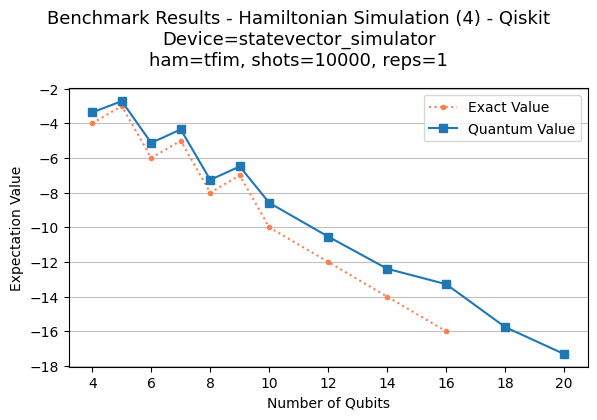

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - Qiskit
Device=statevector_simulator
ham=tfim, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
[0.008, 0.01, 0.014, 0.019, 0.023, 0.033, 0.073, 0.129, 0.289, 1.315]
[0.036, 0.024, 0.028, 0.031, 0.037, 0.039, 0.059, 0.077, 0.112, 0.125, 0.17, 0.354]


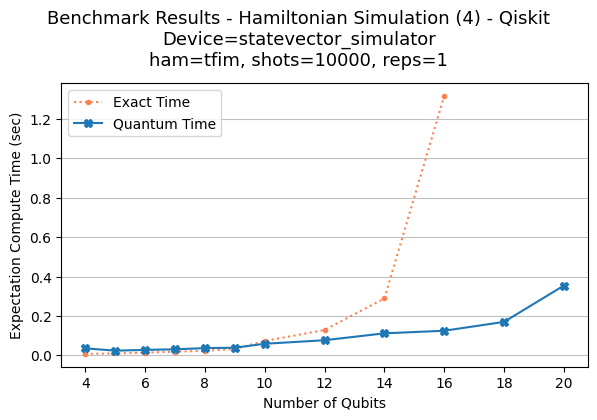

In [4]:
# Transverse Field Ising Model - 1D grid pbc h=2
hamiltonian_name = 'condensedmatter/tfim/tfim'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=4, hamiltonian = hamiltonian_name, K = K, t = t,
                hamiltonian_params = hamiltonian_params,  
                do_observables = True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hamiltonian Simulation - Heisenberg Model


Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/heisenberg/heis.zip
       using cached data if possible
... execution starting at Jan 30, 2025 07:37:00 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... total execution time = 0.075
... exact computation time = 0.02 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -3.1172
    ==> Simulation Quality: 0.779

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... total execution time = 0.09
... exact computation time = 0.032 sec

    Exact expectation value, computed classically: -1.0
    Estimated expectation value, from quantum algorithm: -4.3438
    ==> Simulation Quality: 4.344

************
Executing [1] circuits wit

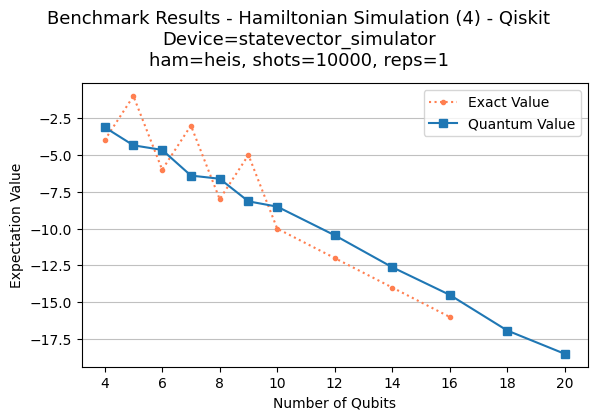

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - Qiskit
Device=statevector_simulator
ham=heis, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
[0.02, 0.032, 0.042, 0.059, 0.078, 0.101, 0.128, 0.183, 0.419, 1.41]
[0.075, 0.09, 0.106, 0.121, 0.129, 0.162, 0.173, 0.234, 0.399, 0.362, 0.461, 0.911]


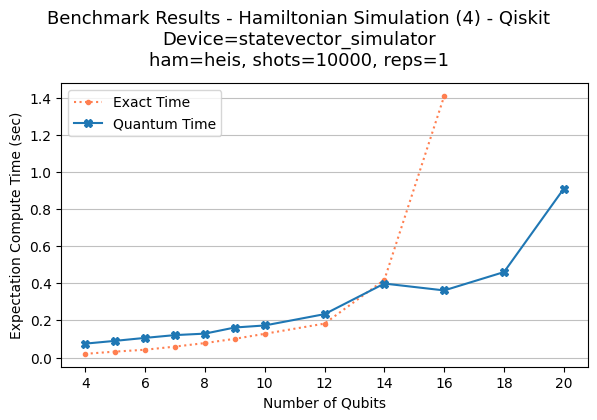

In [12]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/heisenberg/heis'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
    max_circuits=max_circuits, num_shots=num_shots,
    method=4, hamiltonian = hamiltonian_name, K = K, t = t,
    hamiltonian_params = hamiltonian_params,
    do_observables = True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Hamiltonian Simulation - Fermi-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/fermihubbard/FH_D-1.zip
       using cached data if possible
... execution starting at Jan 30, 2025 07:28:27 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-2_U-12_enc-bk
... total execution time = 0.041
... exact computation time = 0.014 sec

    Exact expectation value, computed classically: 0.0
    Estimated expectation value, from quantum algorithm: -0.3203
    ==> Simulation Quality: -216941315415250.4

************
Executing [1] circuits with num_qubits = 6
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-3_U-12_enc-bk
... total execution time = 0.265
... exact computation time = 0.041 sec

    Exact expectation value, computed classically: 0.0
    Estimated expectation value, from quantum algorithm: 1.9795
    ==> Simulation Quality: 35659361

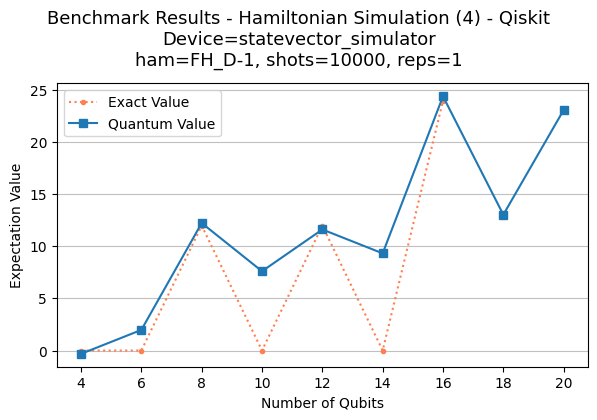

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - Qiskit
Device=statevector_simulator
ham=FH_D-1, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 6, 8, 10, 12, 14, 16, 18, 20]
[0.014, 0.041, 0.075, 0.116, 0.2, 0.42, 2.183]
[0.041, 0.265, 0.249, 0.602, 0.737, 1.311, 0.951, 2.775, 7.609]


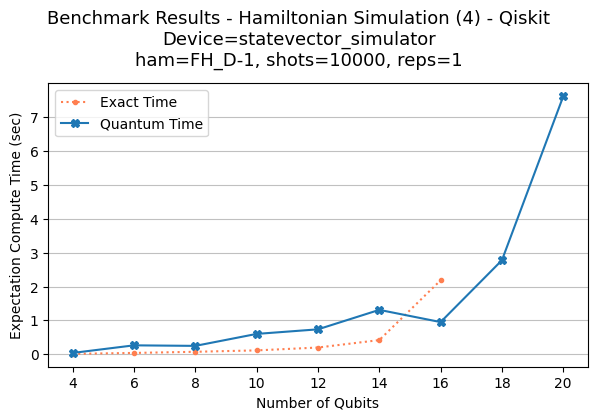

In [6]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/fermihubbard/FH_D-1'
hamiltonian_params = { "1D-grid": "pbc", "enc": "bk", "U":12 }

hamlib_simulation_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
    max_circuits=max_circuits, num_shots=num_shots,
    method=4, hamiltonian = hamiltonian_name, K = K, t = t,
    hamiltonian_params = hamiltonian_params,
    do_observables = True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Hamiltonian Simulation - Bose-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/bosehubbard/BH_D-1_d-4.zip
       using cached data if possible
... execution starting at Jan 30, 2025 07:33:21 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-10_enc-gray_d-4
... total execution time = 0.734
... exact computation time = 0.042 sec

    Exact expectation value, computed classically: 60.0
    Estimated expectation value, from quantum algorithm: 41.9907
    ==> Simulation Quality: 0.7

************
Executing [1] circuits with num_qubits = 6
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-3_U-10_enc-gray_d-4
... total execution time = 1.563
... exact computation time = 0.123 sec

    Exact expectation value, computed classically: 90.0
    Estimated expectation value, from quantum algorithm: 41.9245
    ==> Simulation Quality:

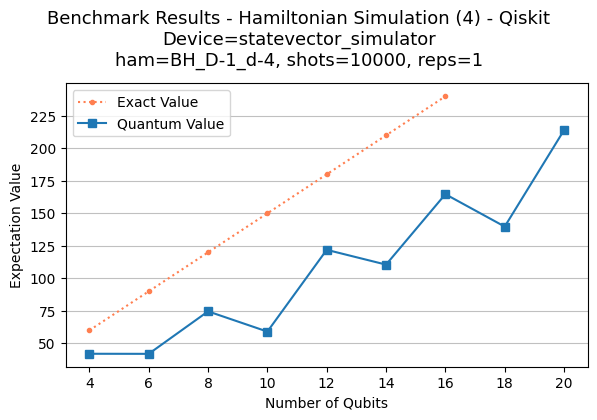

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - Qiskit
Device=statevector_simulator
ham=BH_D-1_d-4, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 6, 8, 10, 12, 14, 16, 18, 20]
[0.042, 0.123, 0.248, 0.428, 0.749, 1.446, 4.154]
[0.734, 1.563, 2.726, 3.485, 4.511, 7.833, 6.905, 9.058, 11.251]


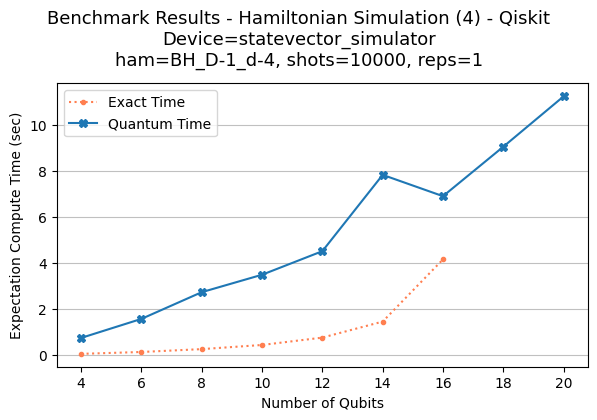

In [11]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/bosehubbard/BH_D-1_d-4'
hamiltonian_params = { "1D-grid": "nonpbc", "enc": "gray", "U":10 }

hamlib_simulation_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
    max_circuits=max_circuits, num_shots=num_shots,
    method=4, hamiltonian = hamiltonian_name, K = K, t = 0.1,
    hamiltonian_params = hamiltonian_params,
    do_observables = True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/binaryoptimization/max3sat/random/random_max3sat-hams.zip
       using cached data if possible
... execution starting at Jan 30, 2025 07:29:51 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = max3sat_n-4_ratio-2_rinst-02
... total execution time = 0.037
... exact computation time = 0.014 sec

    Exact expectation value, computed classically: 7.0
    Estimated expectation value, from quantum algorithm: 7.0
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 5
... dataset_name = max3sat_n-5_ratio-2_rinst-02
... total execution time = 0.048
... exact computation time = 0.025 sec

    Exact expectation value, computed classically: 8.0
    Estimated expectation value, from quantum algorithm: 8.0
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qu

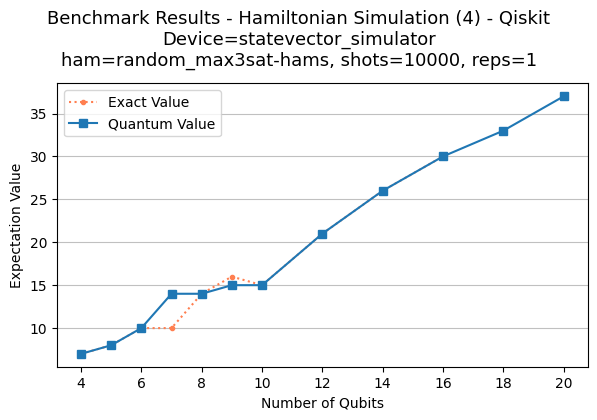

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - Qiskit
Device=statevector_simulator
ham=random_max3sat-hams, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
[0.014, 0.025, 0.039, 0.064, 0.086, 0.121, 0.169, 0.26, 0.363, 1.174]
[0.037, 0.048, 0.06, 0.091, 0.1, 0.141, 0.152, 0.199, 0.311, 0.489, 0.397, 0.76]


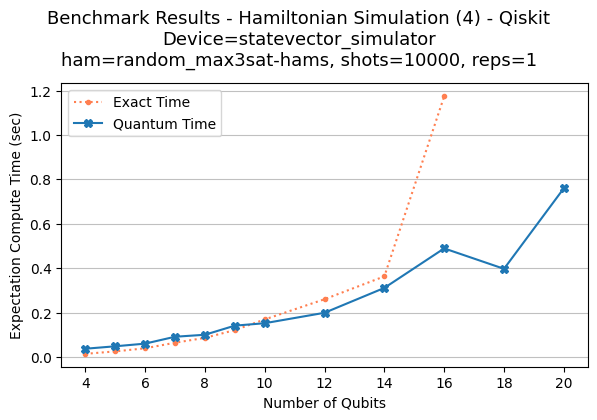

In [8]:
# Max3Sat - ratio 2 rinst 02
hamiltonian_name = 'binaryoptimization/max3sat/random/random_max3sat-hams'
hamiltonian_params = { "ratio": "2", "rinst": "02" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=4, hamiltonian = hamiltonian_name, K = K, t = t,
                hamiltonian_params = hamiltonian_params,
                do_observables = True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/chemistry/electronic/standard/H2.zip
       using cached data if possible
... execution starting at Jan 30, 2025 07:29:58 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = ham_BK-4
... total execution time = 0.098
... exact computation time = 0.017 sec

    Exact expectation value, computed classically: -0.5367
    Estimated expectation value, from quantum algorithm: -0.4454
    ==> Simulation Quality: 0.83

************
Executing [1] circuits with num_qubits = 6
... dataset_name = ham_BK-6
... total execution time = 3.024
... exact computation time = 0.1 sec

    Exact expectation value, computed classically: -0.5102
    Estimated expectation value, from quantum algorithm: -0.2359
    ==> Simulation Quality: 0.462

************
Executing [1] circuits with num_qubits = 8
... dataset_name = ham_BK-8
... tot

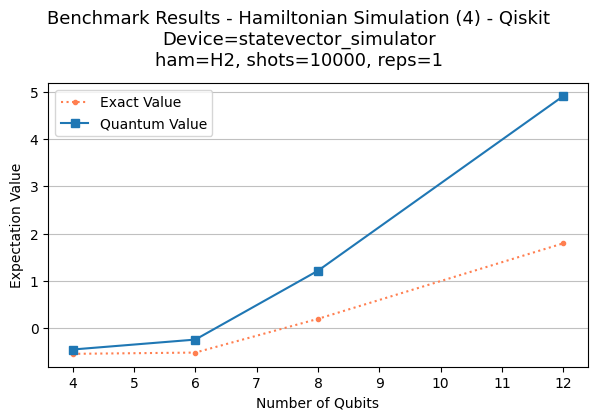

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - Qiskit
Device=statevector_simulator
ham=H2, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 6, 8, 12]
[0.017, 0.1, 0.401, 1.355]
[0.098, 3.024, 27.731, 62.667]


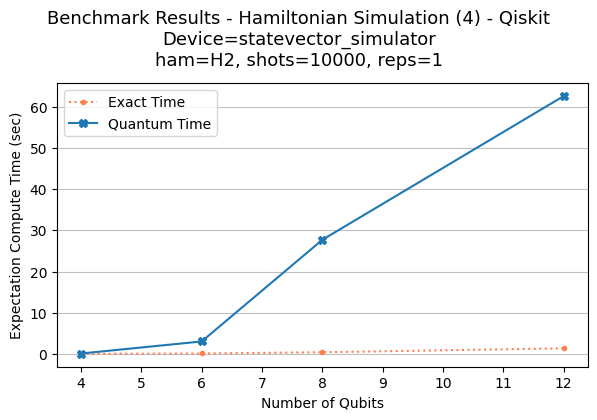

In [9]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/H2'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=min(max_qubits, 12), skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=4, hamiltonian = hamiltonian_name, K = K, t = t,
                hamiltonian_params = hamiltonian_params,
                do_observables = True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Combined Benchmark Results

In [10]:
import qiskit
print(qiskit.__version__)

1.2.1
